1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np

m = np.arange(12).reshape((3,4))
print(m, '\n')

print("The total mean is: ", m.mean()) #ndarray.mean() considers by default the flattened array

#the axis parameter indicates what axis you're summing over: when you consider the sum of the entries of a row, you're fixing
#the row 'i' and summing over the entries of the column 'j'

print("The mean along each row is: ", m.mean(axis = 1)) #fix the row and sum over column (axis = 1 is the column dimension)
print("The mean along each column is: ", m.mean(axis = 0))
    

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

The total mean is:  5.5
The mean along each row is:  [1.5 5.5 9.5]
The mean along each column is:  [4. 5. 6. 7.]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [2]:
import numpy as np

u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

print("#1. Using the function outer in numpy: \n",np.outer(u, v), '\n') #in this order, the opposite order gives the transposed

u_outer_v = np.array([u[i]*v for i in range(len(u))])
print("#2. Using a nested for loop or a list comprehension: \n", u_outer_v, '\n')

u_matrix = u[:, np.newaxis] #add a new dimension to u, then use broadcasting multiplication bw this matrix and the v array
u_outbroad_v = u_matrix*v
print("#3. Using numpy broadcasting operations: \n", u_outbroad_v)

#1. Using the function outer in numpy: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

#2. Using a nested for loop or a list comprehension: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

#3. Using numpy broadcasting operations: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [3]:
import numpy as np
import numpy.random as npr

matrix = 3*npr.rand(10, 6) #create the matrix
print("The matrix is \n", matrix, '\n')

mask = (matrix < 0.3) #create the mask
matrix[mask] = 0 #set the entries indexed by the mask to zero

print("After setting the entries <0.3  to zero the matrix is \n", matrix) #show the result

The matrix is 
 [[2.22694764 1.17426232 1.74350919 2.92234281 0.50081119 0.2662868 ]
 [1.32224306 1.29738818 1.71084267 2.17348267 1.0520918  1.05894798]
 [1.50837145 0.65475444 1.72681673 1.18578299 1.85563042 1.81844645]
 [1.0988586  2.10661344 2.94599009 1.49737331 2.01241671 0.9534935 ]
 [2.18238703 0.35728332 1.172515   2.40549674 0.4603085  2.32963467]
 [0.28391478 2.26570833 1.24306311 1.50809119 2.3877937  1.73707762]
 [0.06091289 0.12617069 1.57549022 2.60019524 0.74133905 1.67554504]
 [0.00550224 0.74608043 1.60046046 2.35072393 2.80175309 2.76025828]
 [1.9775049  1.49906813 0.11482083 1.46554746 2.95680632 1.83584328]
 [2.41299995 0.61949089 1.94527087 0.89586632 0.00619181 1.83296235]] 

After setting the entries <0.3  to zero the matrix is 
 [[2.22694764 1.17426232 1.74350919 2.92234281 0.50081119 0.        ]
 [1.32224306 1.29738818 1.71084267 2.17348267 1.0520918  1.05894798]
 [1.50837145 0.65475444 1.72681673 1.18578299 1.85563042 1.81844645]
 [1.0988586  2.10661344 2.94

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

Array of 100 numbers between  0  and  2𝜋
  [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.3946540

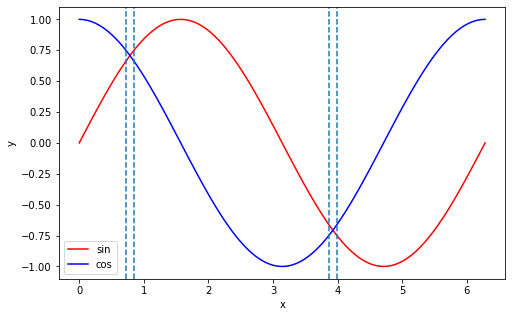

In [86]:
import numpy as np
import math
import matplotlib.pyplot as plt

lattice = np.linspace(0, 2*math.pi, 100) #create the array
print("Array of 100 numbers between  0  and  2𝜋\n ", lattice, '\n')

tenth = lattice[9::10] #extract every 10th element using the slice notation
print("Every tenth element \n", tenth, '\n')

reverse = lattice[::-1] #reverse the array using the slice notation
print("Reversed array \n", reverse, '\n')

sin = np.vectorize(math.sin)
cos = np.vectorize(math.cos)
mask = (abs(sin(lattice)-cos(lattice)) < 0.1) #Extract elements where the absolute difference between the sin and cos functions evaluated for that element is  <0.1
print("|sin(x)-cos(x)|<0.1 in \n", lattice[mask], '\n')

#plt.plot(lattice, abs(sin(lattice)-cos(lattice)), 'b')
#plt.plot(lattice, np.full(100, 0.1), 'r')

fig = plt.figure(figsize=(8, 5))
plt.xlabel("x")
plt.ylabel("y")
ax = plt.plot(lattice, sin(lattice), 'r', label = 'sin')
plt.plot(lattice, cos(lattice), 'b', label = 'cos')
plt.legend(loc = 'lower left')
plt.axvline(0.717, linestyle = 'dashed')
plt.axvline(0.855, linestyle = 'dashed')
plt.axvline(3.861, linestyle = 'dashed')
plt.axvline(3.993, linestyle = 'dashed')

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [7]:
import numpy as np

row = np.arange(1,11)
column = np.arange(1,11)
multiplication_table = np.outer(row, column)
print("Multiplication table:\n", multiplication_table, '\n')

print("The trace of the matrix is ", np.trace(multiplication_table), '\n')
print("The anti-diagonal matrix is \n", np.fliplr(np.diag(np.fliplr(multiplication_table).diagonal())), '\n')
print("The diagonal offset by 1 upwards is \n", np.diag(multiplication_table, k = 1))

Multiplication table:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

The trace of the matrix is  385 

The anti-diagonal matrix is 
 [[ 0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0]] 

The diagonal offset by 1 upwards is 
 [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [8]:
import numpy as np

route_66 = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
print("Positions in miles are \n", route_66, '\n')

r = route_66[:, np.newaxis]
distance = abs(route_66 - r)
print("The grid of distances (in miles) is \n", distance, '\n')
conversion = np.vectorize(lambda x : x*1.6)
print("The grid of distances (in km) is \n", conversion(distance), '\n')

Positions in miles are 
 [   0  198  303  736  871 1175 1475 1544 1913 2448] 

The grid of distances (in miles) is 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

The grid of distances (in km) is 
 [[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8 

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

For N=99
The prime numbers in [0, 99 ] are 
 [ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]
This operation took 0.0029730999999628693 s
[1.24300000e-04 1.12120000e-03 1.17067000e-02 8.68850000e-02
 8.32060500e-01 8.06816420e+00 8.17035686e+01] 

The plot shows an exponential growth in semilog scale, therefore the time scales (in first approximation) linearly with N


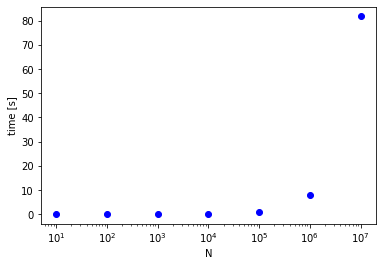

In [27]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

start = timeit.default_timer()
N = 99
print("For N=99")
l = np.arange(N+1)
 
for i in range(2, N+1):
    mask = (l % i == 0) & (l != i)
    l[mask] = 0
prime = l[l != 0]
print("The prime numbers in [0,", N, "] are \n",prime)
print("This operation took", timeit.default_timer() - start, "s")

N_array = np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000])
times = []
for j in range (1, 8):
    start = timeit.default_timer()
    for i in range(2, 10**j):
        mask = (l % i == 0) & (l != i)
        l[mask] = 0
    prime = l[l != 0]
    times.append(timeit.default_timer() - start)
times_array = np.array(times)
print(times_array, '\n')

plt.xscale('log')
plt.xlabel("N")
plt.ylabel("time [s]")
plt.plot(N_array, times_array, 'bo')
print("The plot shows an exponential growth in semilog scale, therefore the time scales (in first approximation) linearly with N")

8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

The distances covered by the 1000 walkers are 
 [ 14   0  12 -10  -4   6  -8  10  12   6   8   2  14  16   2 -20 -18 -10
 -36   8  -8  30   6   4  -2  12 -18  -6  20   0   6 -24   6   4  -8  16
  -8   4  16  -2  -6  24  -4   4  -6  -2   8   2 -10  10  24  -6 -16  -4
  10  -4  16  14  10 -26 -16   4   0  -4 -14  18 -12   6  10   0 -18  10
 -12  18   4 -10  24  12  22 -12 -10  -4   6  20   2 -28   8  30   6   2
  -2  18 -18  -8 -12   2  12  22   2  10  -4 -12  12  10   2 -14  -4  -8
  -4  12   8   4  26   0 -14  -6  -8  24  36   8 -16  10 -14 -30  12 -10
  18  -6   0  24  -4 -10 -22  24  -8  -6 -14  14  14  34  12  18  -6   0
   8   8   0 -10  -4   0   8 -24   8   8 -28  10  -4 -18 -10  10  12 -10
  18  -2   8  -8  -2   6 -16  -8  12   6 -38   2  -4 -20  -6 -38  12  -2
  -2 -18  -2  -8 -12  26 -10  -8  20 -26 -10  26 -16  18  24   0  20  -6
 -10   8  28 -10   6  26  16  14  -4   0   2 -10  10 -20  26  16   2  -4
   4  -8 -32   0  12   8 -16  -6  -8 -12 -34 -18  -4   4 -24 -20  12   0
  -

Mean of the squared distances at each step (position[i] = mean (along walkers) of squared distance (distance up to step i)

 [0.0, 0.0, 1.0, 2.1, 3.216, 4.16, 5.024, 5.884, 6.72, 7.908, 8.784, 9.58, 10.424, 11.224, 12.136, 13.16, 14.328, 15.184, 16.328, 17.88, 18.072, 18.664, 19.416, 20.692, 21.696, 22.524, 23.832, 24.76, 25.992, 27.616, 28.72, 29.548, 30.808, 32.288, 33.328, 34.132, 35.424, 36.404, 37.552, 38.784, 39.336, 40.088, 41.464, 42.468, 43.328, 44.592, 46.464, 46.98, 47.64, 48.784, 50.096, 51.768, 53.336, 55.248, 55.84, 56.56, 57.76, 58.652, 59.392, 59.992, 61.336, 61.88, 63.368, 63.996, 65.424, 67.016, 67.936, 68.868, 69.76, 71.36, 72.152, 72.98, 75.264, 76.144, 78.072, 79.008, 79.728, 80.652, 81.856, 81.7, 83.224, 83.92, 84.368, 84.496, 86.224, 87.216, 88.736, 89.252, 90.136, 90.968, 91.848, 93.128, 94.744, 96.244, 97.864, 98.928, 99.464, 100.996, 101.8, 102.916, 104.112, 104.508, 105.24, 106.068, 107.192, 108.288, 108.816, 110.24, 111.864, 113.54, 114.368, 115.072, 116.112

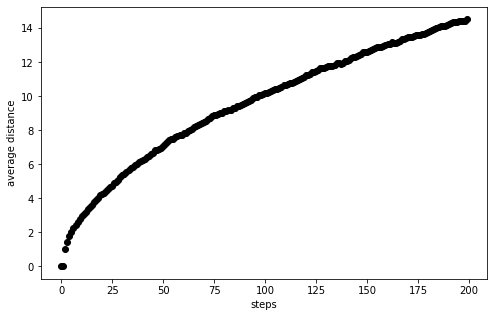

In [90]:
import numpy as np
import math
import numpy.random as npr

step = np.array([-1, 1])
matrix = npr.choice(step, size = (1000, 200)) #create the 2d array (walkers, steps)

distance = np.sum(matrix, axis = 1) #calculate the walking distances
d_squared = distance*distance
print("The distances covered by the 1000 walkers are \n", distance, "\n")
print("The squared distances covered by the 1000 walkers are \n", d_squared, "\n")


mean_sqd = []
for j in range(0, 200):
    mds = []
    index = range(1, j)
    for i in range(0,1000):
        s = matrix[(i, index)].sum()
        mds.append(s*s)
    M = np.array(mds)
    mean_sqd.append(M.mean())
print("Mean of the squared distances at each step (position[i] = mean (along walkers) of squared distance (distance up to step i)\n\n",mean_sqd)

sqrt = np.vectorize(math.sqrt)
mean_distance = sqrt(mean_sqd)

fig = plt.figure(figsize=(8, 5))
plt.xlabel("steps")
plt.ylabel("average distance")
plt.plot(range(200), mean_distance, 'ko')